<a href="https://colab.research.google.com/github/RafaelLVaz/Checkpoint_02_Casos-de-Uso-de-ML-Eolica-Solar/blob/main/CP_SERS_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [32]:
df = pd.read_csv('/content/KAG_energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


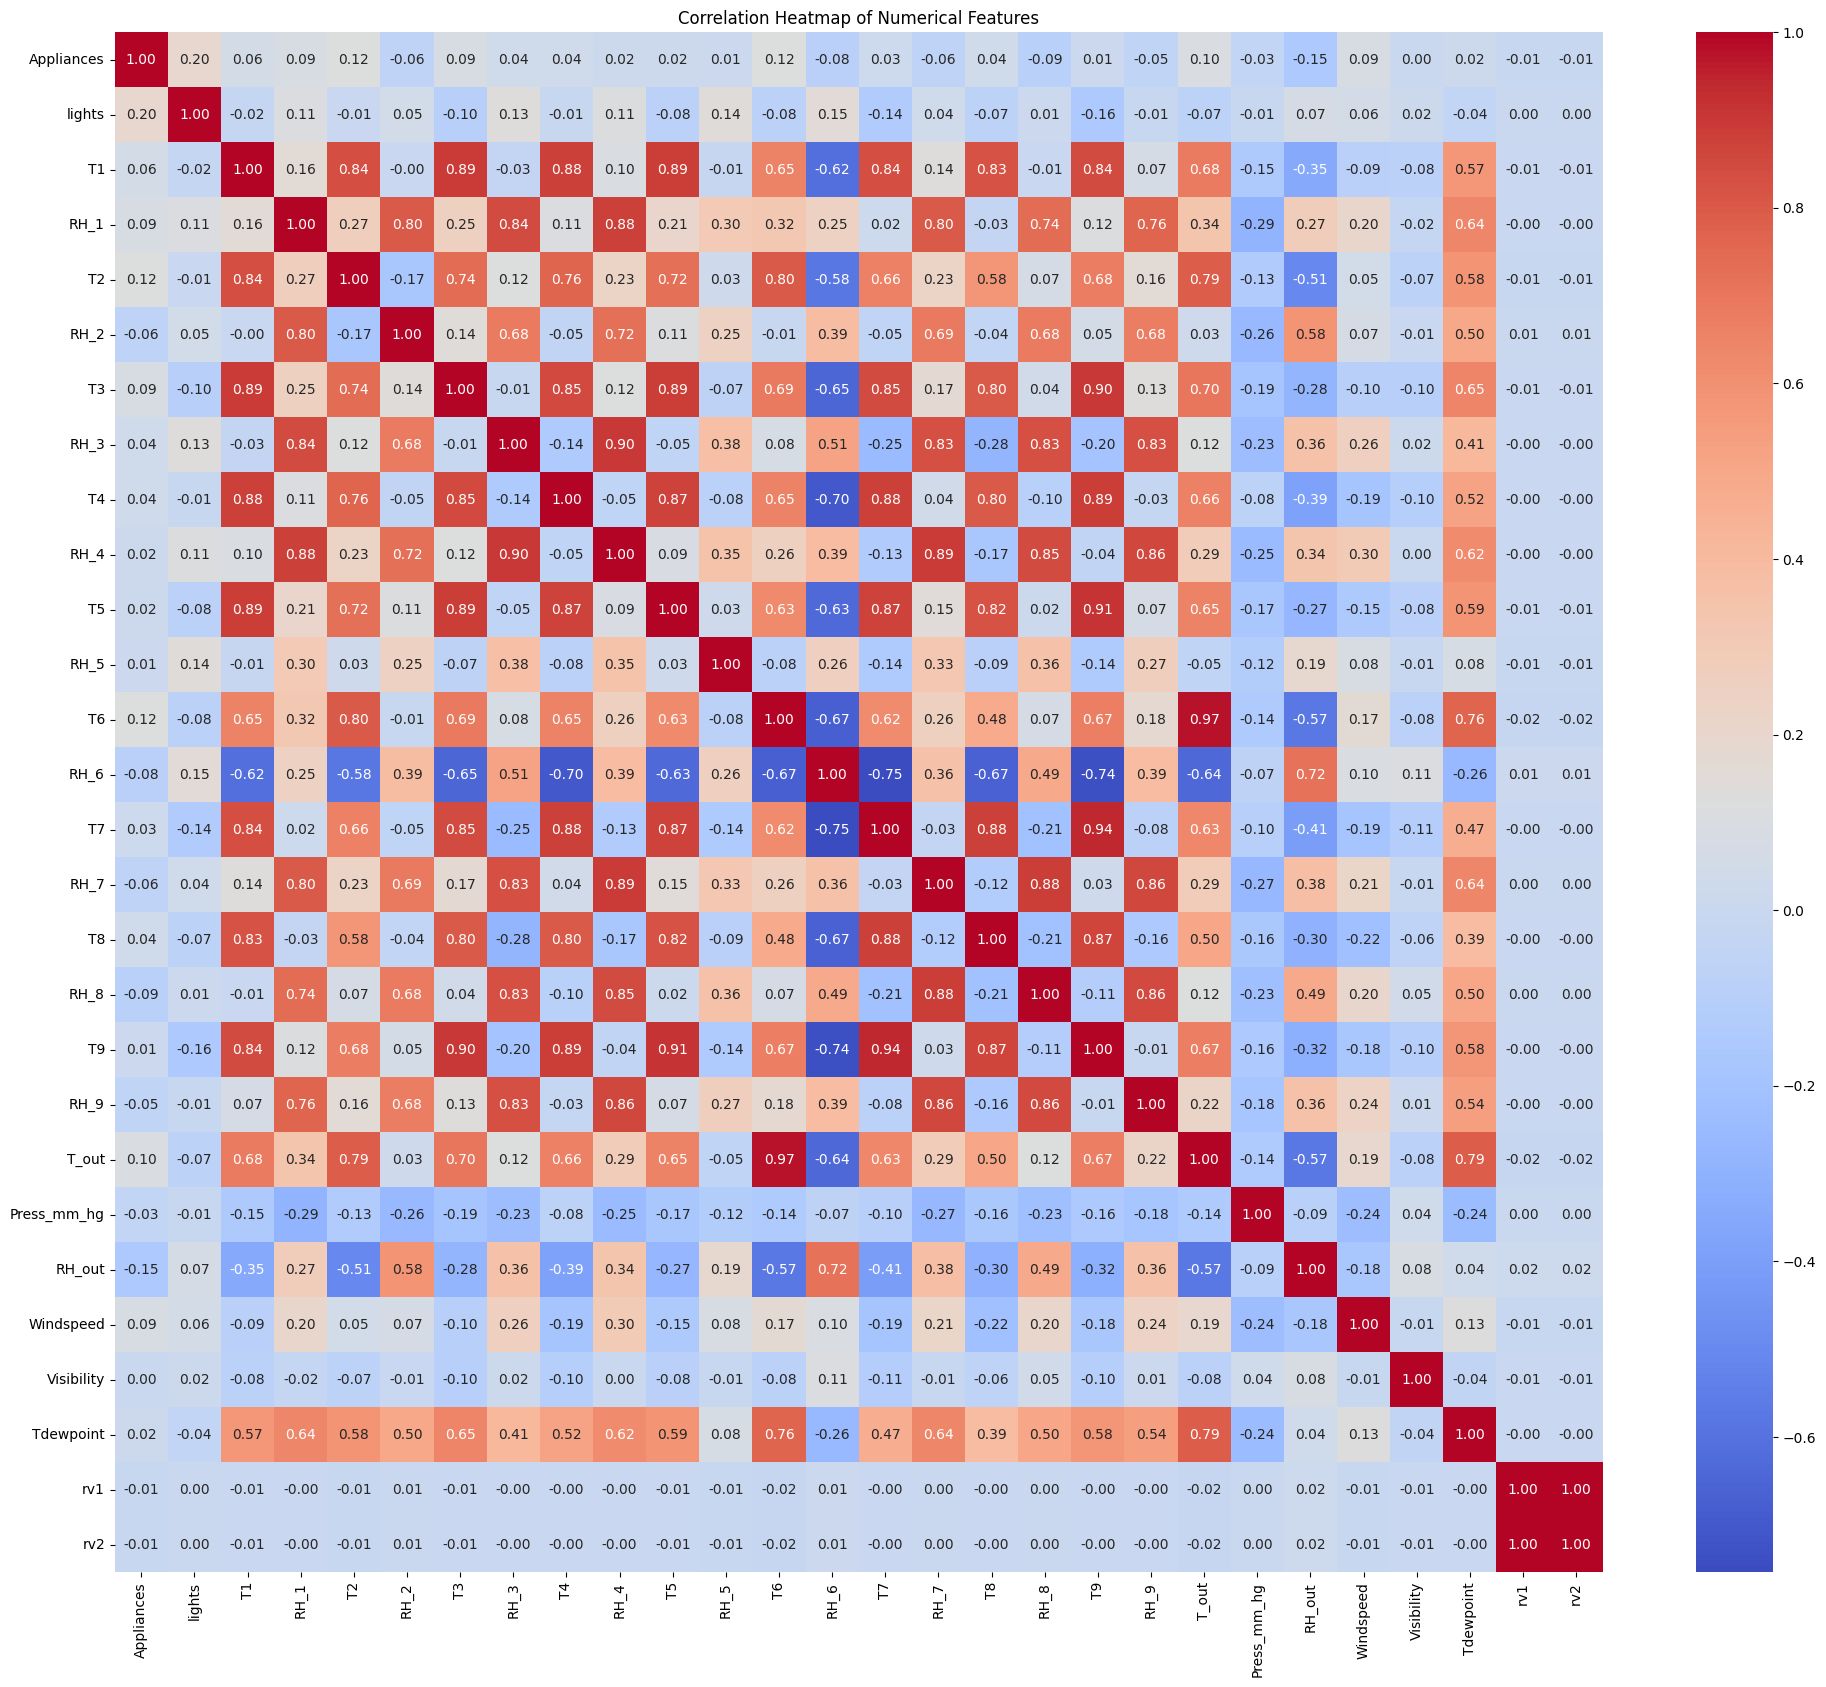

In [33]:
df_numerics = df.select_dtypes(include=np.number)
corr_matrix = df_numerics.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [34]:
X = df_numerics.drop(['Appliances'], axis=1)
y = df_numerics['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
dt_model = DecisionTreeRegressor(random_state=0, max_depth=10, min_samples_leaf=5)
rf_model = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=10, min_samples_leaf=5)
lr_model = LinearRegression()

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

In [36]:
# Evaluate Decision Tree
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Performance:")
print(f"RMSE: {dt_rmse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R2 Score: {dt_r2:.2f}")
print("-" * 30)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R2 Score: {rf_r2:.2f}")
print("-" * 30)

# Evaluate Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Performance:")
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R2 Score: {lr_r2:.2f}")

Decision Tree Performance:
RMSE: 96.39
MAE: 47.81
R2 Score: 0.17
------------------------------
Random Forest Performance:
RMSE: 86.32
MAE: 43.14
R2 Score: 0.34
------------------------------
Linear Regression Performance:
RMSE: 97.66
MAE: 54.18
R2 Score: 0.15
